In [ ]:
import pandas as pd
df = pd.read_csv('raw_data.csv', encoding='latin-1')
df.head()

,Sno,Date,Headline,Covid,Sentiment,Description,Image,Source
0,0,2020-04-29,"Coronavirus cases reach 2,438 in Rajasthan; 81...",1,0,Rajasthan on Wednesday reported 74 new coronav...,https://static.inshorts.com/inshorts/images/v1...,http://www.rajswasthya.nic.in/?utm_campaign=fu...
1,1,2020-04-29,"Coronavirus cases in Delhi surge to 3,439 afte...",1,0,The total number of coronavirus cases in Delhi...,https://static.inshorts.com/inshorts/images/v1...,https://twitter.com/shemin_joy/status/12555489...
2,2,2020-04-30,"Anguished, I'll always recall our interactions...",0,1,"Condoling the demise of actor Rishi Kapoor, PM...",https://static.inshorts.com/inshorts/images/v1...,https://twitter.com/narendramodi/status/125573...
3,3,2020-04-30,It's a terrible week for Indian cinema: Rahul ...,0,0,Congress leader Rahul Gandhi condoled Rishi Ka...,https://static.inshorts.com/inshorts/images/v1...,https://zeenews.india.com/india/politicians-mo...
4,4,2020-04-30,Delhi Police perform 'parikrama' of AIIMS to t...,1,1,As a sign of respect for healthcare profession...,https://static.inshorts.com/inshorts/images/v1...,https://zeenews.india.com/india/delhi-police-p...


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


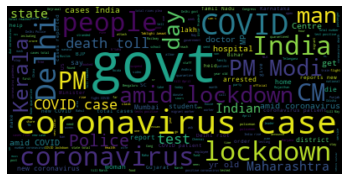

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create stopword list:
stopwords = set(stopwords.words('english'))
stopwords.update(["br", "href"])
textt = " ".join(news for news in df.Headline)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

In [ ]:
positive = df[df['Sentiment'] == 1]
negative = df[df['Sentiment'] == 0]
'''neutral = df[df['Sentiment'] == 'Neutral']
epositive = df[df['Sentiment'] == 'Extremely Positive']
enegative = df[df['Sentiment'] == 'Extremely Negative']'''

"neutral = df[df['Sentiment'] == 'Neutral']\nepositive = df[df['Sentiment'] == 'Extremely Positive']\nenegative = df[df['Sentiment'] == 'Extremely Negative']"

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


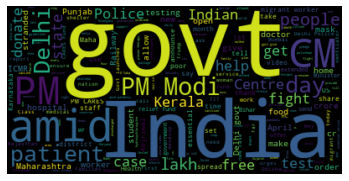

In [ ]:
from nltk.corpus import stopwords
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))
stopwords.update(["br", "href","good","great","coronavirus","covid","lockdown"]) 
## good and great removed because they were included in negative sentiment
pos = " ".join(news for news in positive.Headline)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

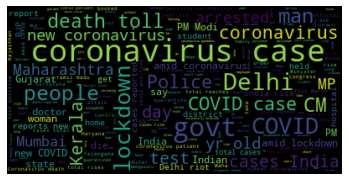

In [ ]:
from nltk.corpus import stopwords

stopwords = set(stopwords.words('english'))

neg = " ".join(review for review in negative.Headline)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud33.png')
plt.show()

In [ ]:
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"'))
    return final
df['Headline'] = df['Headline'].apply(remove_punctuation)
#df = df.dropna(subset=['Description'])
#df['Description'] = df['Description'].apply(remove_punctuation)

In [ ]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [ ]:
import re
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

def predict():
  index = df.index
  df['random_number'] = np.random.randn(len(index))
  train = df[df['random_number'] <= 0.8]
  test = df[df['random_number'] > 0.8]
  trainl = []
  testl=[]
  sentences1 = list(train['Headline'])
  sentence2= list(test['Headline'])
  for sen in sentences1:
      trainl.append(preprocess_text(sen))
  for sen in sentence2:
      testl.append(preprocess_text(sen))
  vectorizer = TfidfVectorizer(min_df = 5,
                              max_df = 0.8,
                              sublinear_tf = True,
                              use_idf = True)
  train_matrix = vectorizer.fit_transform(trainl)
  test_matrix = vectorizer.transform(testl)
  lr = LogisticRegression()
  X_train = train_matrix
  X_test = test_matrix
  y_train = train['Sentiment']
  y_test = test['Sentiment']
  lr.fit(X_train,y_train)
  predictions = lr.predict(X_test)
  new = np.asarray(y_test)
  print(confusion_matrix(predictions,y_test))
  print(classification_report(predictions,y_test))


In [ ]:
#predict()

              precision    recall  f1-score   support

           0       0.91      0.81      0.86       624
           1       0.54      0.74      0.63       191

    accuracy                           0.79       815
   macro avg       0.73      0.77      0.74       815
weighted avg       0.82      0.79      0.80       815

